# Time Series - ARIMA Forecasting

#Rob Rappa
#11/10/19

#Source - DataCamp - Forecasting Using ARIMA in Python

In [84]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt

#Augmented Dickey-Fuller
# Used to test stationarity
# Null hypothesis: time series is non-stationary
# If p-value is low, time series is stationary
# If p-value is high, time series may be stationary
from statsmodels.tsa.stattools import adfuller

#ARMA Process
from statsmodels.tsa.arima_process import arma_generate_sample

#ARMA Model
from statsmodels.tsa.arima_model import ARMA

#Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

#SEASONAL
from statsmodels.tsa.seasonal import seasonal_decompose


#Notes
# d (non-seasonal difference) + D (seasonal-difference) shoudl never be more than 2 combined, and 1 individually
# With additive seasonality, only differencing is needed
# With multiplicative seasonality, it looks like the amplitude of seasonal periods is growing/shrinking.  Need other transforms (e.g., log transform before modelin to make it additive)

# Read Data

In [60]:
#Read Amazon data
#Downloaded from Yahoo Finance

#Read into pandas
amzn = pd.read_csv('time_series_AMZN.csv', sep=",")

amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-07,735.72998,743.260010,728.900024,739.010010,739.010010,6622800
1,2016-11-14,745.51001,767.739990,710.099976,760.159973,760.159973,25789400
2,2016-11-21,766.00000,792.400024,765.109985,780.369995,780.369995,15303300
3,2016-11-28,776.98999,777.000000,736.700012,740.340027,740.340027,20564300
4,2016-12-05,745.00000,773.789978,742.000000,768.659973,768.659973,17454800


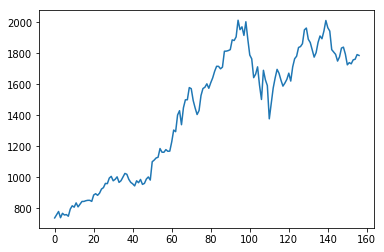

In [72]:
plt.figure()
plt.plot(amzn.index,amzn['Close'])
plt.show()

# Identify Model

In [67]:
#Use Augmented Dickey Fuller to Identify Difference Order

# Used to test stationarity
# Null hypothesis: time series is non-stationary
# If p-value is low, time series is stationary
# If p-value is high, time series may be stationary

#Calculate results
adfuller_results = adfuller(amzn['Close'])

#Test Statistic: 
print('Test statistic is',adfuller_results[0])

#p-value: 
print('p-value is ',adfuller_results[1])

#Since the p-value is high, we cannot conslude it's stationary

Test statistic is -1.413389350850138
p-value is  0.5758405296216761


In [89]:
#Transform 1: Difference the dataset

amzn_diff = amzn['Close'].diff().dropna()

amzn_diff.head()

1    21.149963
2    20.210022
3   -40.029968
4    28.319946
5   -10.889953
Name: Close, dtype: float64

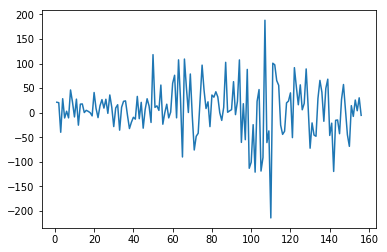

In [90]:
#Transform 1: Plot

plt.figure()
plt.plot(amzn_diff.index,amzn_diff)
plt.show()

In [92]:
#Transform 1: ADF again to check stationarity

#Calculate results
adfuller_diff = adfuller(amzn_diff)

#Test Statistic: 
print('Test statistic is',adfuller_diff[0])

#p-value: 
print('p-value is ',adfuller_diff[1])

#Since the p-value is low, we can conclude it's stationary

Test statistic is -12.348096697179034
p-value is  5.90946800595452e-23


In [124]:
#Transform 2: Difference the dataset

amzn_diff_log = np.log(amzn_diff/amzn_diff.shift(1)).dropna()

amzn_diff_log.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


2    -0.045460
9    -0.779605
14    0.020074
15   -4.640523
16    3.306774
Name: Close, dtype: float64

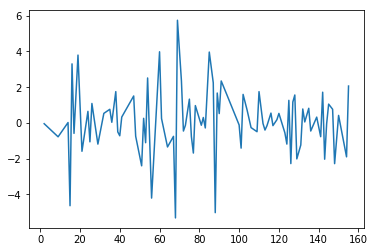

In [125]:
#Transform 1: Plot

plt.figure()
plt.plot(amzn_diff_log.index,amzn_diff_log)
plt.show()

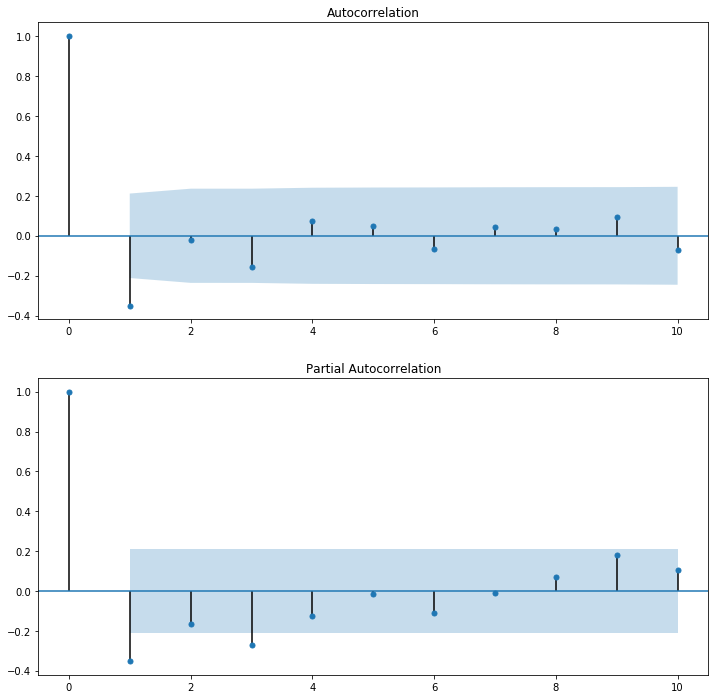

In [126]:
#ACF/PACF

#Build the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,12))

#Plot ACF
plot_acf(amzn_diff_log,lags=10,zero=True,ax=ax1)

#Plot PACF
plot_pacf(amzn_diff_log,lags=10,zero=True,ax=ax2)

#Show the image
plt.show()

In [86]:
#No clear view on p,q in ARIMA(p,1,q) - let's use a loop

# Estimate Parameters

In [127]:
#Build several models

#Store output list
results_list = []

for p in range(4):
    
    for q in range(4):
        
        try:
            
            model = SARIMAX(amzn_diff_log,order=(p,1,q),trend='c')
            results = model.fit()
            
            results_list.append((p,q,results.aic,results.bic))
            
        except:
            
            print(p,q,None,None)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored whe

0 2 None None
0 3 None None


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored whe

1 2 None None
1 3 None None
2 1 None None
2 2 None None
2 3 None None


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 3 None None


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [128]:
#Order the output

results_df = pd.DataFrame(results_list,columns=['p','q','AIC','BIC'])

print(results_df.sort_values('AIC'))

   p  q         AIC         BIC
6  3  1  344.885671  359.541578
7  3  2  345.128734  362.227293
3  1  1  348.361845  358.132450
1  0  1  356.863593  364.191547
5  3  0  373.823910  386.037167
4  2  0  386.782046  396.552651
2  1  0  395.410210  402.738163
0  0  0  434.346413  439.231716


In [131]:
#Fit Best Model 

#Seems the best model is ARIMA(0,1,1)

model_final = SARIMAX(amzn_diff_log,order=(1,1,1),trend='c')
results_final = model_final.fit()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# Diagnostics

In [132]:
#Model Summary

print(results_final.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                   86
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -170.181
Date:                Mon, 11 Nov 2019   AIC                            348.362
Time:                        16:52:46   BIC                            358.132
Sample:                             0   HQIC                           352.292
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0012      0.010     -0.119      0.906      -0.021       0.019
ar.L1         -0.3427      0.076     -4.514      0.000      -0.491      -0.194
ma.L1         -1.0000     45.662     -0.022      0.9

In [133]:
#Results are good

#Prob(Q)  = Ljung-Box   = p-value for null hypothesis that residuals are uncorrelated.  Looks high here, so good.
#Prob(JB) = Jarque-Bera =  p-value for null hypothesis that residuals are normal.  Looks high here, so good.

#Since Prob(Q) is high, we still believe residuals are uncorrelated
#Since Prob(JB) is low, we cannot believe the residuals are normal

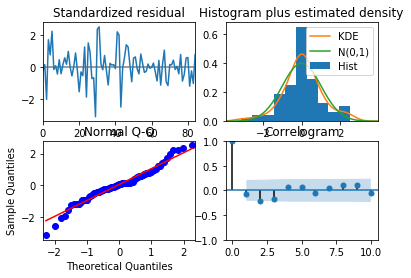

In [134]:
#Model Diagnostics

results_final.plot_diagnostics()
plt.show()

In [135]:
#Standardized residual - still have an outlier there
#Histogram - KDE looks more peaked than normal

# Forecast

In [136]:
#Generate forecast
forecast_onestep = results_final.get_prediction(start=-30)


In [144]:
#Extract mean prediction
forecast_mean_onestep = forecast_onestep.predicted_mean

print(forecast_mean_onestep.head())

112   -0.401829
113    0.214737
114    0.329318
116    0.236348
117   -0.001649
dtype: float64


In [145]:
#Extract confidence intervals
forecast_confint_onestep = forecast_onestep.conf_int()

#Confidence - lower limit
forecast_conf_lower = forecast_confint_onestep.loc[:,'lower Close']

#Confidence - upper limit
forecast_conf_upper = forecast_confint_onestep.loc[:,'upper Close']

print(forecast_confint_onestep.head())

     lower Close  upper Close
112    -3.839211     3.035553
113    -3.222106     3.651580
114    -3.107005     3.765642
116    -3.199472     3.672169
117    -3.436985     3.433686


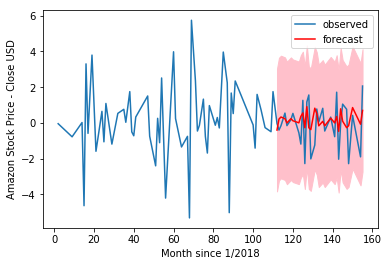

In [146]:
#Plot data and forecasts

#Plot data
plt.plot(amzn_diff_log.index,amzn_diff_log,label='observed')

#Plot predictions
plt.plot(forecast_mean_onestep.index,forecast_mean_onestep,color='r',label='forecast')

#Plot confidence bounds
plt.fill_between(forecast_conf_lower.index,forecast_conf_lower,forecast_conf_upper,color='pink')

#Labels
plt.xlabel('Month since 1/2018')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()